<a href="https://colab.research.google.com/github/Vijaya-lakshmi4/Minor-project/blob/main/Project_1_Cardiovascular_Disease_Prediction_using_Machine_Learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #imported Seaborn with the alias sns
import plotly.express as px # library to create a pie chart in Python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import svm,datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn import datasets


In [ ]:
df=pd.read_csv("/content/cardio_train.csv")
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
25067,35798;19103;1;159;59.0;120;80;1;1;0;0;1;1
25068,35799;16850;2;175;86.0;140;80;2;1;1;0;1;1
25069,35800;19578;1;162;68.0;110;60;3;1;0;0;1;1
25070,35801;14716;2;162;64.0;120;70;1;1;0;0;1;0


# **Data pre-processing operations**

In [ ]:
import pandas as pd

# Define the path to the CSV file
csv_file_path = '/content/cardio_train.csv'

# Load the CSV file into a DataFrame with the correct delimiter
cardio_df = pd.read_csv(csv_file_path, delimiter=';')

cardio_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25067,35798,19103,1,159,59.0,120,80,1.0,1.0,0.0,0.0,1.0,1.0
25068,35799,16850,2,175,86.0,140,80,2.0,1.0,1.0,0.0,1.0,1.0
25069,35800,19578,1,162,68.0,110,60,3.0,1.0,0.0,0.0,1.0,1.0
25070,35801,14716,2,162,64.0,120,70,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
cardio_df.shape

(70000, 13)

In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
cardio_df.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
cardio_df_cleaned=cardio_df.dropna()
cardio_df_cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
cardio_df_cleaned.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
cardio_df_cleaned['active'].value_counts()

active
1    56261
0    13739
Name: count, dtype: int64

In [ ]:
# Description
cardio_df_cleaned.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# **Exploratory Data Analysis(EDA) and visualizations**

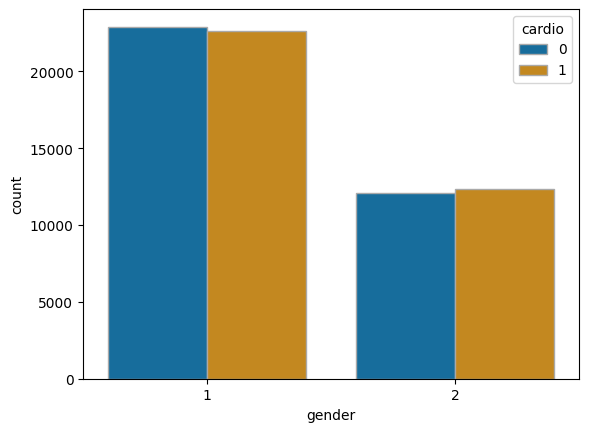

In [ ]:
sns.countplot(x='gender', hue='cardio', data=cardio_df_cleaned, palette='colorblind', edgecolor='darkgray')

# Show the plot
plt.show()

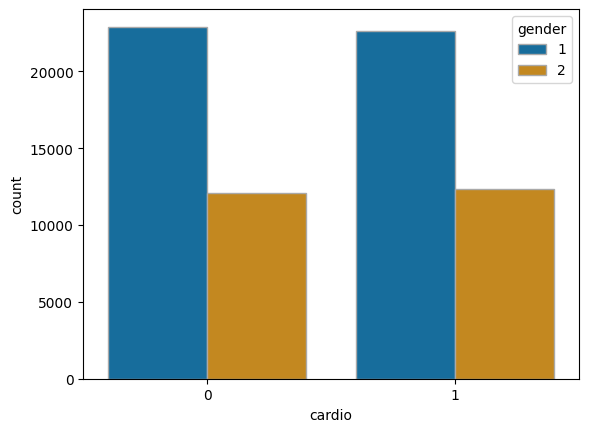

In [ ]:
sns.countplot(x='cardio', hue='gender', data=cardio_df_cleaned, palette='colorblind', edgecolor='darkgray')

# Show the plot
plt.show()

In [ ]:
#generates a pie chart from the "cardio" column of your DataFrame
fig = px.pie(cardio_df_cleaned,names="cardio",hole = 0.4,template = "plotly_dark")
fig.show()

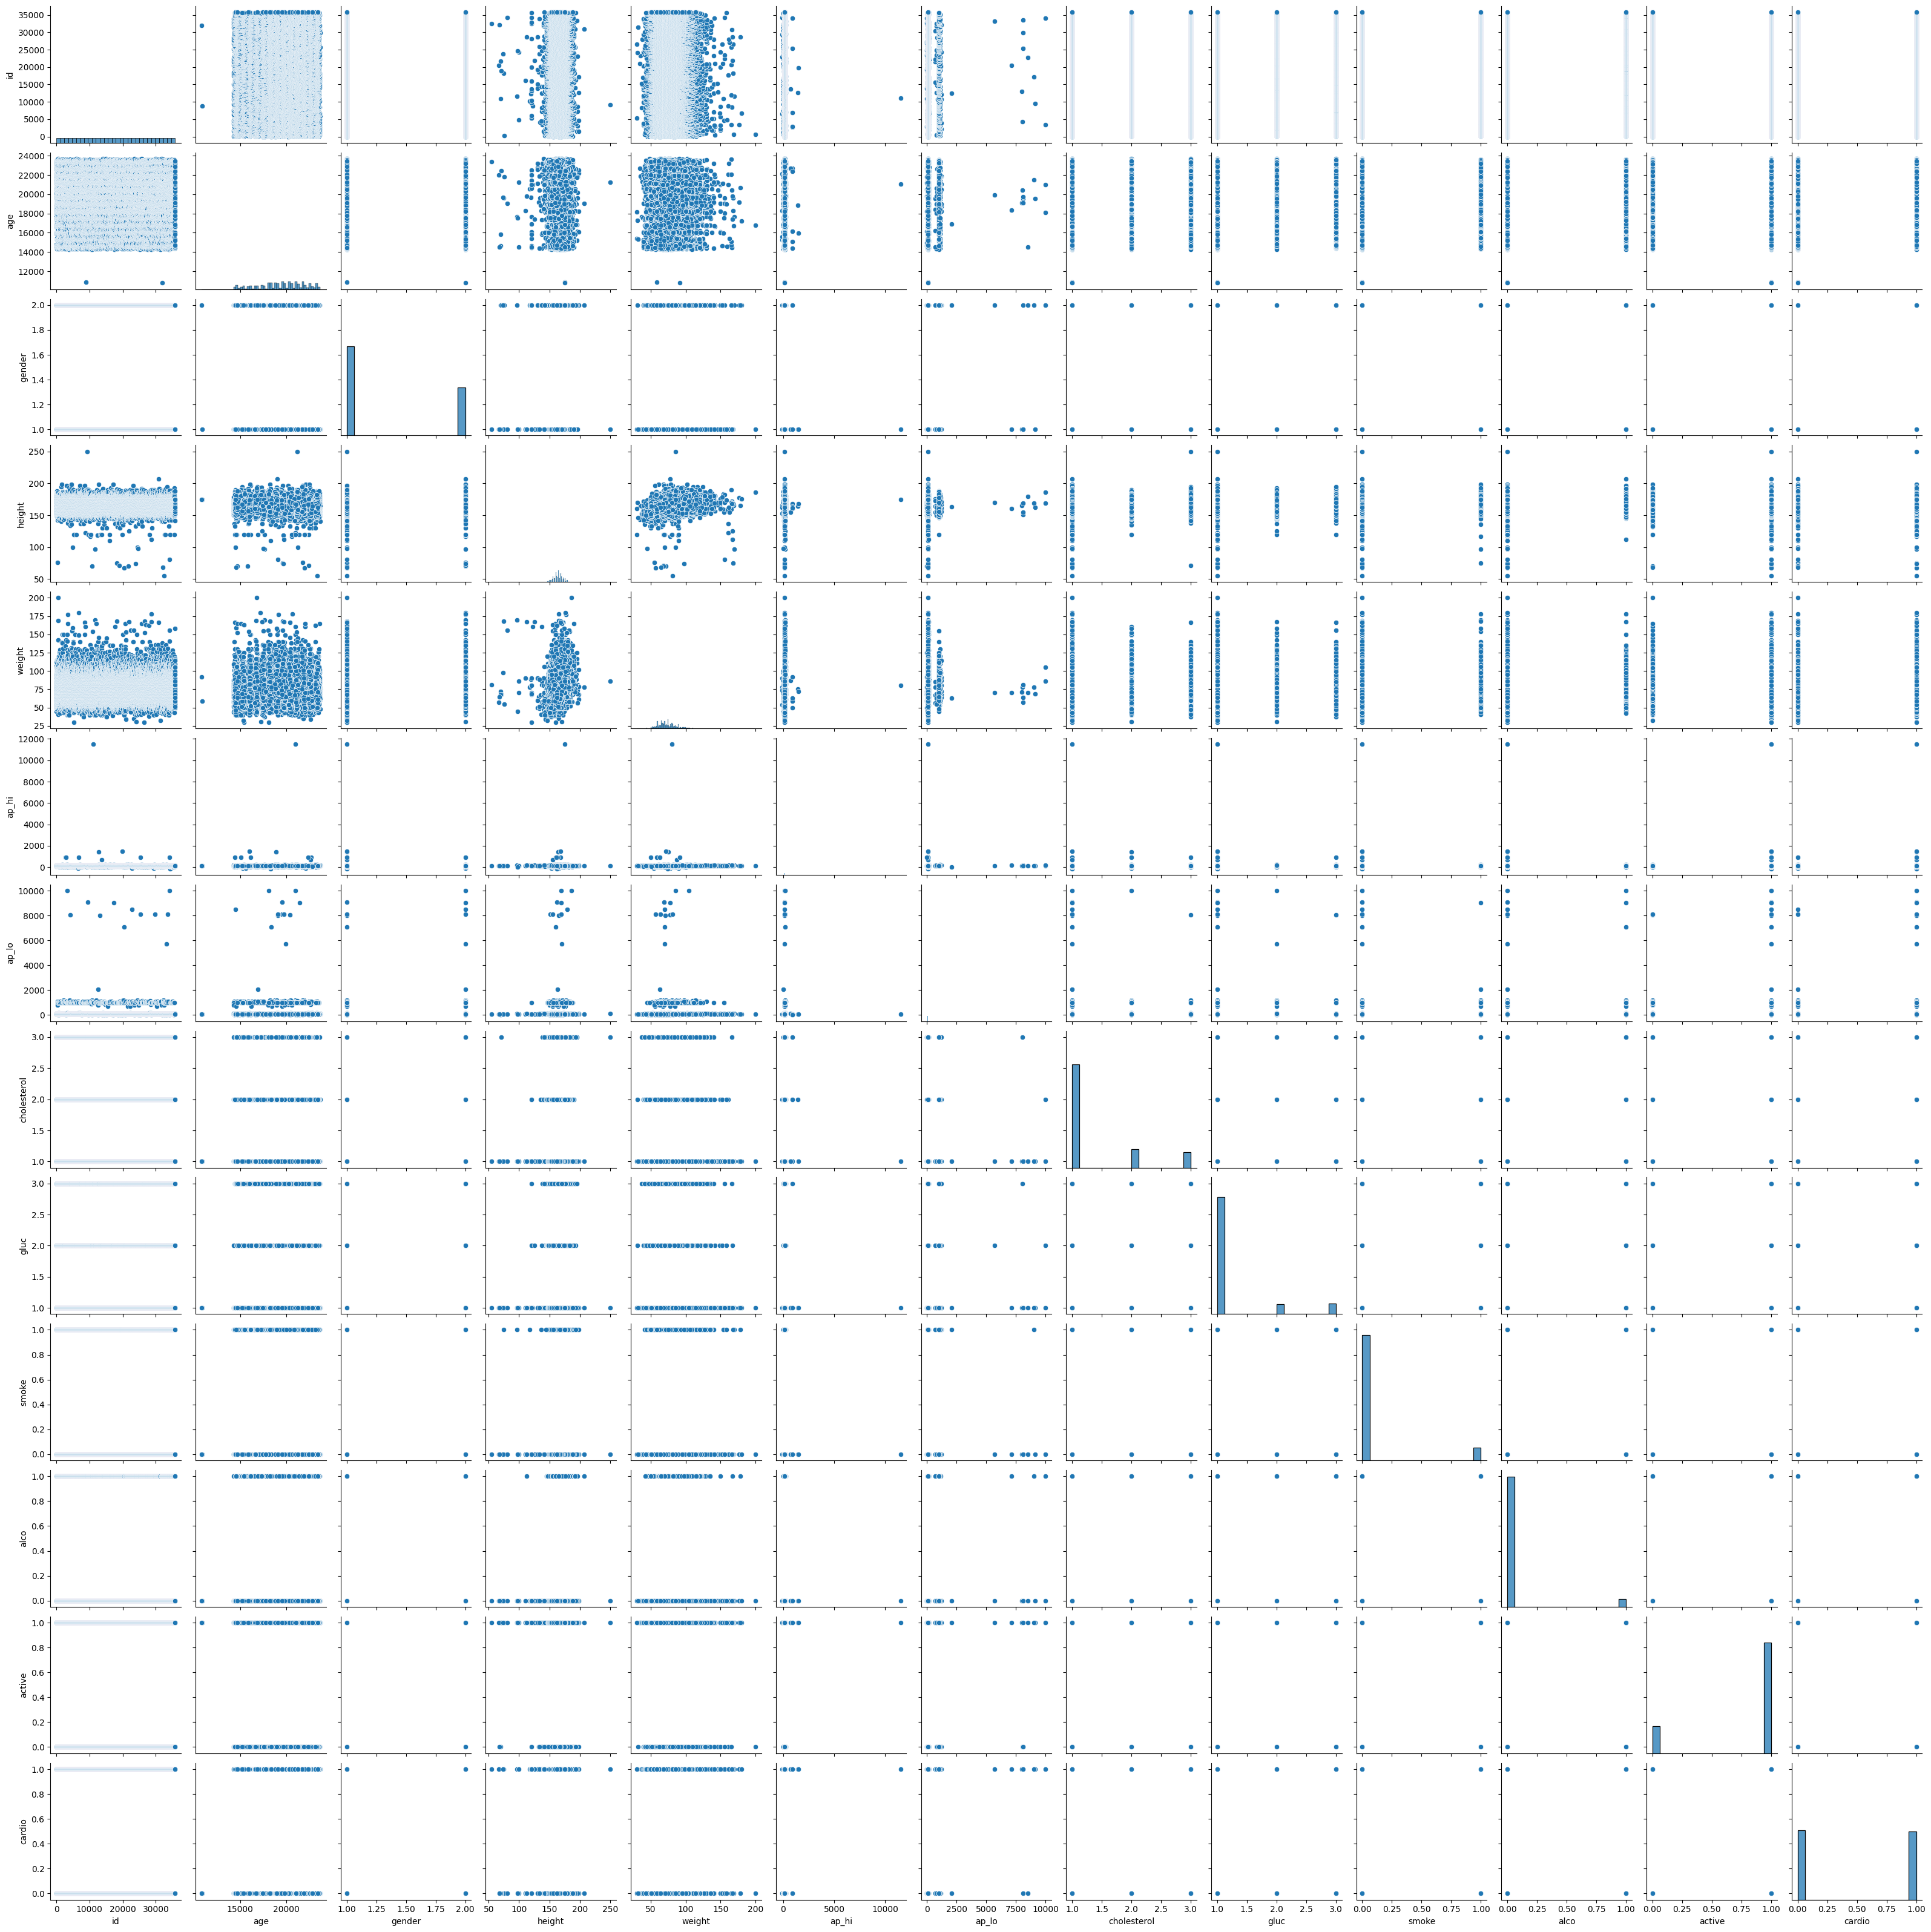

In [ ]:
#used to create a pair plot & histograms for each variable along the diagonal
#each pair of numerical variables will show
sns.pairplot(cardio_df_cleaned)

# **Correelation matrix**

<Axes: >

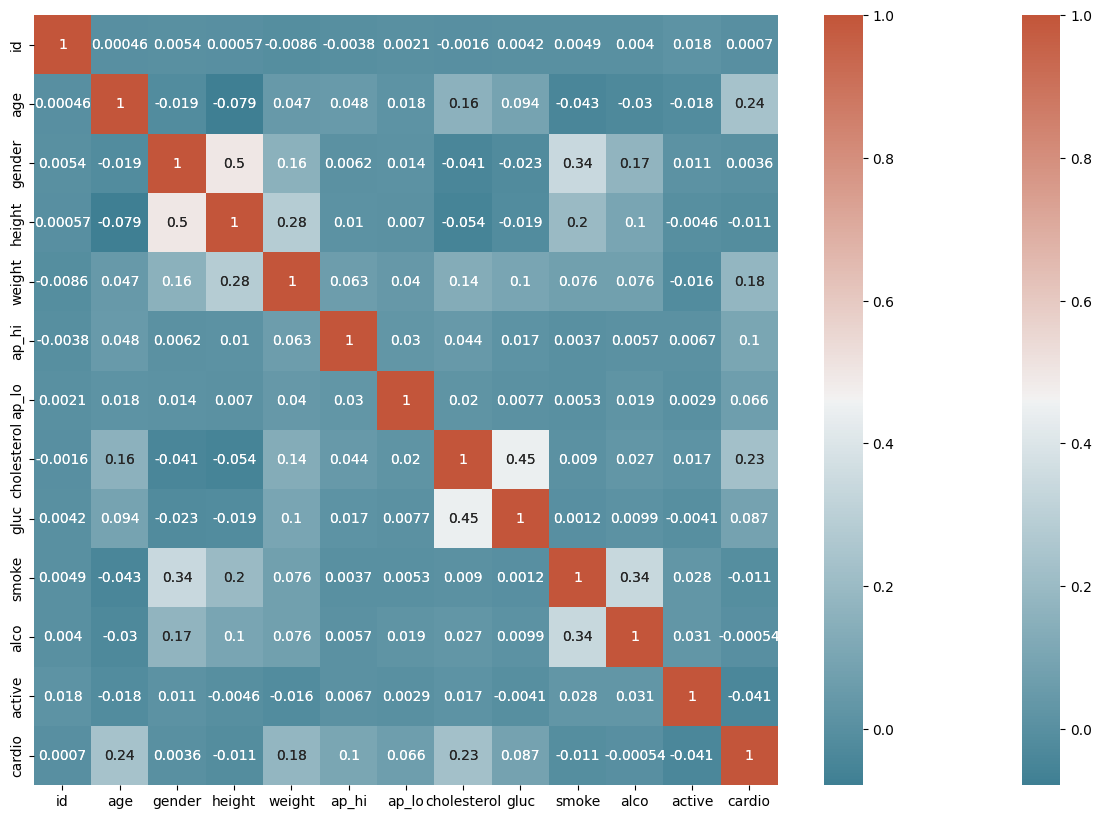

In [ ]:
corr = cardio_df_cleaned.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

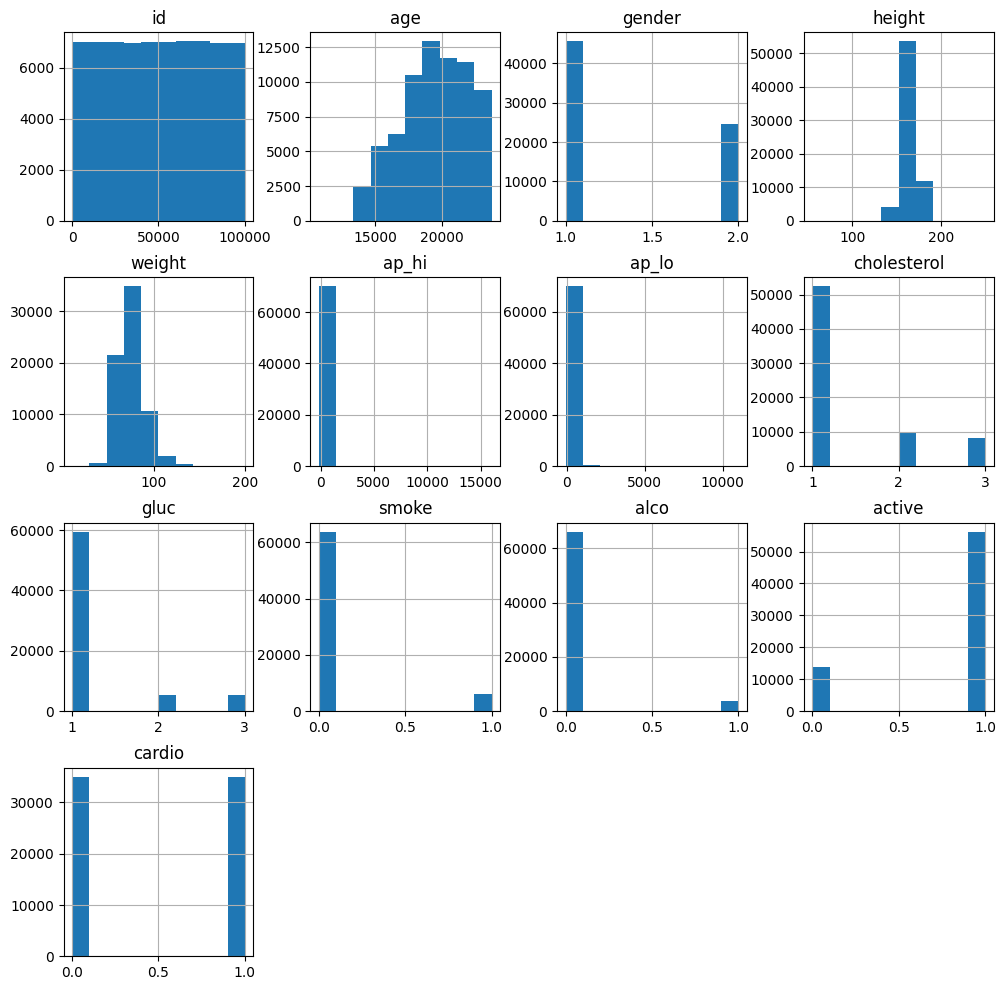

In [ ]:
cardio_df_cleaned.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [ ]:
# Filtering data by positive Heart Disease patient
pos_data = cardio_df_cleaned[cardio_df_cleaned['active']==1]
pos_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,56261.000000,56261.000000,56261.000000,56261.000000,56261.000000,56261.000000,56261.000000,56261.000000,56261.000000,56261.000000,56261.000000,56261.0,56261.000000
mean,50025.957573,19456.762127,1.350954,164.332575,74.085702,128.814774,97.075630,1.370203,1.224543,0.091751,0.056611,1.0,0.490891
std,28830.055017,2464.902819,0.477273,8.165544,14.369657,148.164321,190.076954,0.683920,0.570802,0.288677,0.231100,0.0,0.499921
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
25%,25074.000000,17643.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
50%,50019.000000,19698.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
75%,74940.000000,21315.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.0,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,14020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
# Filtering data by negative Heart Disease patient
neg_data = cardio_df_cleaned[cardio_df_cleaned['active']==0]
neg_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,13739.000000,13739.000000,13739.000000,13739.000000,13739.000000,13739.000000,13739.000000,13739.000000,13739.000000,13739.000000,13739.000000,13739.0,13739.000000
mean,49753.183929,19518.430235,1.343911,164.468375,74.697038,128.827571,94.807264,1.353228,1.234297,0.073295,0.042143,0.0,0.535774
std,28938.165314,2476.319780,0.475029,8.389637,14.492310,175.945649,181.750110,0.664863,0.578199,0.260630,0.200922,0.0,0.498737
min,2.000000,14282.000000,1.000000,59.000000,32.000000,-120.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,24695.000000,17778.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000
50%,49878.000000,19721.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000
75%,74660.500000,21393.000000,2.000000,170.000000,83.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000
max,99998.000000,23692.000000,2.000000,198.000000,200.000000,16020.000000,8099.000000,3.000000,3.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
print("(Positive Patients ST depression): " + str(pos_data['active'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['active'].mean()))

(Positive Patients ST depression): 1.0
(Negative Patients ST depression): 0.0


In [ ]:
print("(Positive Patients thalach): " + str(pos_data['cardio'].mean()))
print("(Negative Patients thalach): " + str(neg_data['cardio'].mean()))

(Positive Patients thalach): 0.4908906702689252
(Negative Patients thalach): 0.5357740738044982


# **Machine Learning + Predictive Analytics**

In [ ]:
x=cardio_df_cleaned.iloc[:,:-1]
x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
y=cardio_df_cleaned.iloc[:,12:]
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=30,random_state=1)

In [ ]:
xtrain

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
57578,82172,23090,2,170,70.0,120,80,1,1,0,0,1
17147,24505,21484,1,165,68.0,120,80,1,1,0,0,0
50504,72082,18976,1,168,72.0,120,90,1,1,0,0,1
61868,88347,22571,1,155,54.0,150,100,1,1,0,0,0
52359,74680,19002,2,170,62.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49100,70099,21289,2,175,78.0,120,80,1,1,0,0,1
20609,29410,19116,1,164,68.0,120,80,1,1,0,0,0
21440,30634,18049,2,178,82.0,120,80,1,1,0,0,1
50057,71447,21957,1,169,77.0,120,80,1,1,0,0,0


In [ ]:
ytrain

,cardio
57578,1
17147,0
50504,0
61868,1
52359,1
...,...
49100,1
20609,0
21440,0
50057,1


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
Lgf=LogisticRegression()
Lgf.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [ ]:
y_pred1 = Lgf.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
logscore=Lgf.score(xtest,ytest)
logscore

0.9

# **Random forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
Rclf=RandomForestClassifier()
Rclf.fit(xtrain,ytrain)

<ipython-input-34-694238f3881a>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [ ]:
y_pred6 = Rclf.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred6))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [ ]:
randscore=Rclf.score(xtest,ytest)
randscore

0.8333333333333334

## **Decision Tree Clssifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
Clf=DecisionTreeClassifier()
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
y_pred5 = Clf.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred5))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.75      0.64      0.69        14

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



In [ ]:
descore=Clf.score(xtest,ytest)

[Text(0.5954971143658867, 0.9912280701754386, 'x[5] <= 129.5\ngini = 0.5\nsamples = 69970\nvalue = [35005, 34965]'),
 Text(0.38508103353759615, 0.9736842105263158, 'x[1] <= 19960.5\ngini = 0.434\nsamples = 41309\nvalue = [28145, 13164]'),
 Text(0.22566133151495862, 0.956140350877193, 'x[7] <= 2.5\ngini = 0.364\nsamples = 25474\nvalue = [19384, 6090]'),
 Text(0.11777754302573598, 0.9385964912280702, 'x[1] <= 16099.5\ngini = 0.348\nsamples = 24389\nvalue = [18926, 5463]'),
 Text(0.04887235756608914, 0.9210526315789473, 'x[7] <= 1.5\ngini = 0.241\nsamples = 6728\nvalue = [5784, 944]'),
 Text(0.03147894763123607, 0.9035087719298246, 'x[5] <= 114.5\ngini = 0.218\nsamples = 6069\nvalue = [5312, 757]'),
 Text(0.014897089716580252, 0.8859649122807017, 'x[8] <= 1.5\ngini = 0.157\nsamples = 2574\nvalue = [2353, 221]'),
 Text(0.00904329983881652, 0.868421052631579, 'x[4] <= 68.5\ngini = 0.148\nsamples = 2434\nvalue = [2238, 196]'),
 Text(0.004264667145589255, 0.8508771929824561, 'x[6] <= 140.0\ng

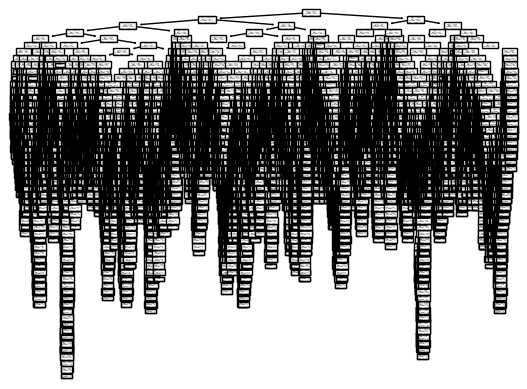

In [ ]:
from sklearn import tree
tree.plot_tree(Clf)

# **K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier()

In [ ]:
y_pred2 = knn.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.67      0.57      0.62        14

    accuracy                           0.67        30
   macro avg       0.67      0.66      0.66        30
weighted avg       0.67      0.67      0.66        30



In [ ]:
knnscore=knn.score(xtest,ytest)
knnscore

0.6666666666666666

# **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
Svcf=SVC()
Svcf.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC()

In [ ]:
y_pred3 = Svcf.predict(xtest) # get y predictions
print(classification_report(ytest, y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.50      0.50      0.50        14

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30



In [ ]:
svcscore=Svcf.score(xtest,ytest)

# **Making the Confusion Matrix**

In [ ]:
models = pd.DataFrame({
    "model" : ["Logistic Regression",
               "Decision Tree",
               "Random Forest",
               "KNN",
               "SVM",
               ],
    "Accuracy Score" : [ logscore, descore ,
                          randscore ,knnscore ,
                          svcscore ]

})

models

,model,Accuracy Score
0,Logistic Regression,0.900000
1,Decision Tree,0.733333
2,Random Forest,0.833333
3,KNN,0.666667
4,SVM,0.533333


,model,Accuracy Score
0,Logistic Regression,0.900000
2,Random Forest,0.833333
1,Decision Tree,0.733333
3,KNN,0.666667
4,SVM,0.533333


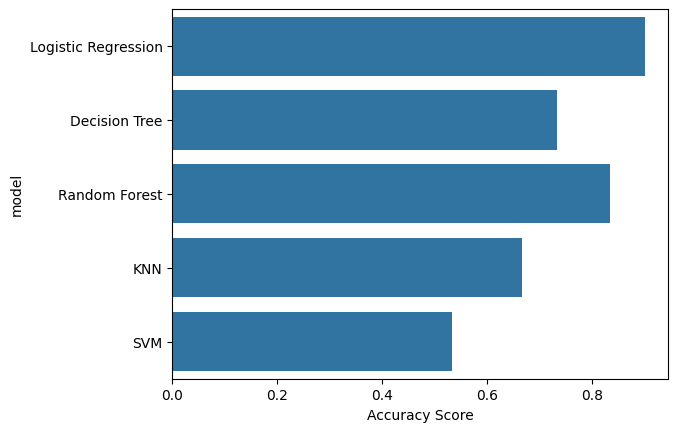

In [ ]:
sns.barplot(x="Accuracy Score", y= "model",data = models)
models.sort_values(by = "Accuracy Score",ascending = False)

In [ ]:
#;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
#example to enter below
#14532;2;181;95.0;130;90;1;1;1;1;0;0
v1=int(input("Enter age vlaue  :"))
v1



Enter age vlaue  :15242


15242

In [ ]:
v2=int(input("Enter gender vlaue :"))
v2


Enter gender vlaue :1


1

In [ ]:
v3=float(input("Enter height vlaue  :"))
v3


Enter height vlaue  :148


148.0

In [ ]:
v4=float(input("Enter weight vlaue  :"))
v4


Enter weight vlaue  :68


68.0

In [ ]:
v5=float(input("Enter ap_hi vlaue  :"))
v5


Enter ap_hi vlaue  :128


128.0

In [ ]:
v6=float(input("Enter ap_lo vlaue  :"))
v6


Enter ap_lo vlaue  :90


90.0

In [ ]:
v7=int(input("Enter cholesterol vlaue :"))
v7


Enter cholesterol vlaue :1


1

In [ ]:
v8=int(input("Enter gluc vlaue :"))
v8


Enter gluc vlaue :1


1

In [ ]:
v9=int(input("Enter smoke vlaue :"))
v9


Enter smoke vlaue :1


1

In [ ]:
v10=int(input("Enter alco vlaue :"))
v10


Enter alco vlaue :1


1

In [ ]:
v11=int(input("Enter active vlaue :"))
v11

Enter active vlaue :0


0

In [ ]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Represent the RandomForestClassifier with specified hyperparameters
model_rf = RandomForestClassifier(max_depth = 14 , random_state = 11,n_estimators=30)

# Train the RandomForest model
model_rf.fit(x_train,y_train)

<ipython-input-73-49ba999056a6>:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=14, n_estimators=30, random_state=11)

In [ ]:
#predictions on the test set
pred_rf = model_rf.predict(x_test)
accuracy_score_rf = accuracy_score(y_test , pred_rf)
accuracy_score_rf*100


73.83571428571429

In [ ]:
#confussion matrix
cm3 = confusion_matrix(y_test,pred_rf)
cm3
# 367 correct classifed as 0 and 35 is wrong classifed as 0
# 169 correct classifed as 1 and 85 is wrong classifed as 1

array([[5377, 1593],
       [2145, 4885]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred6)
print(cm)
accuracy_score(ytest, y_pred6)


[[13  3]
 [ 2 12]]


0.8333333333333334

# **Feature Importance**

In [ ]:
importance = Rclf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.18325
Feature: 1, Score: 0.21879
Feature: 2, Score: 0.01397
Feature: 3, Score: 0.12008
Feature: 4, Score: 0.13356
Feature: 5, Score: 0.17346
Feature: 6, Score: 0.08146
Feature: 7, Score: 0.03663
Feature: 8, Score: 0.01442
Feature: 9, Score: 0.00737
Feature: 10, Score: 0.00635
Feature: 11, Score: 0.01067


<Axes: >

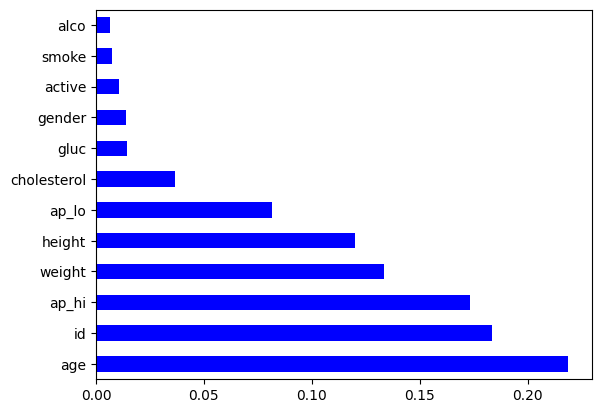

In [ ]:
index= cardio_df_cleaned.columns[:-1]
importance = pd.Series(Rclf.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')